In [54]:
import loader
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
discards = [
  "kepler_name",
  "kepid",
  "kepoi_name",
  "koi_pdisposition",
  #"koi_disposition",
  "koi_comment",
  "koi_disp_prov",
  "koi_parm_prov",
  "koi_sparprov",
  "koi_vet_date",
  "koi_datalink_dvr",
  "koi_datalink_dvs",
  "koi_quarters",
  "koi_fittype",
  "koi_trans_mod",
  "koi_model_dof",
  "koi_delivname",
  "koi_vet_stat",
  "koi_limbdark_mod",
  "koi_sparprov",
  "koi_tce_delivname",
  "koi_depth_err2",
  "koi_time0bk_err2",
  "koi_time0_err2",
  "koi_time0bk_err2",
  "koi_period_err2",
  "koi_dor_err2",
  "koi_time0bk_err1",
  "koi_time0bk_err2",
  "koi_time0bk_err1",
  "koi_duration_err2",
  "koi_time0bk",
  "koi_fwm_sra",
  "koi_fwm_sdec",
  "koi_ror_err1",
  "koi_fwm_sdeco_err",
  "koi_rmag",
  "koi_fwm_prao_err",
  "koi_kmag",
  "koi_zmag",
  "koi_fwm_srao_err",
  "koi_zmag",
  "koi_dor_err1",
  "koi_dor_err2",
  "koi_ror",
  "koi_jmag",
  "koi_kepmag",
  "koi_kmag",
  "koi_rmag",
  "koi_period",
  "koi_period",
  "koi_period",
  "koi_zmag",
  "koi_prad_err2",
  "koi_rmag",
  "koi_zmag",
  "koi_ror_err2",
  "koi_zmag",
  "koi_kepmag",
  "koi_zmag",
  "koi_insol_err2",
  "koi_ldm_coeff2",
  "koi_jmag",
  "koi_imag",
  "koi_dikco_mra_err",
  "koi_fwm_srao_err",
  "koi_fwm_srao_err",
  "koi_fwm_sra_err",
  "koi_fwm_sra_err",
  "koi_zmag",
  "koi_imag",
  "koi_kepmag",
  "koi_dikco_msky_err",
  "koi_dikco_mdec_err",
  "koi_kepmag",
  "koi_rmag",
  "koi_dikco_msky_err",
  "koi_dicco_msky_err",
  "koi_rmag",
  "koi_insol_err1",
  "koi_dicco_msky_err",
  "koi_dikco_mdec"
]

In [61]:
result, status, message = loader.loadcsvfile("koi_exoplanets.csv")
if(status == 0):
    raise Exception(message)
print(result)

         kepid kepoi_name   kepler_name         ra  ra_err        ra_str  \
0     10797460  K00752.01  Kepler-227 b  291.93423     0.0  19h27m44.22s   
1     10797460  K00752.02  Kepler-227 c  291.93423     0.0  19h27m44.22s   
2     10811496  K00753.01           NaN  297.00482     0.0  19h48m01.16s   
3     10848459  K00754.01           NaN  285.53461     0.0  19h02m08.31s   
4     10854555  K00755.01  Kepler-664 b  288.75488     0.0  19h15m01.17s   
...        ...        ...           ...        ...     ...           ...   
9559  10090151  K07985.01           NaN  297.18875     0.0  19h48m45.30s   
9560  10128825  K07986.01           NaN  286.50937     0.0  19h06m02.25s   
9561  10147276  K07987.01           NaN  294.16489     0.0  19h36m39.57s   
9562  10155286  K07988.01           NaN  296.76288     0.0  19h47m03.09s   
9563  10156110  K07989.01           NaN  297.00977     0.0  19h48m02.34s   

            dec  dec_err       dec_str  koi_gmag  ...  koi_fpflag_co  \
0     48.141651

In [62]:
import re

def string_to_ms(texto: str) -> int:
    """
    Convierte un literal de duración como '47d21h15m30.5s' a milisegundos.
    Partes posibles (todas opcionales, pero al menos una debe existir):
      d = días, h = horas, m = minutos, s = segundos (puede ser decimal)
    Orden esperado: d h m s (sin reordenar). Ejemplos válidos:
      '10s', '3m25s', '2h', '1d2h', '4d3h2m1.25s'
    Retorna:
      int: total en milisegundos.
    Lanza:
      ValueError si el formato es inválido.
    """
    patron = re.compile(
        r'^(?:(?P<d>\d+)d)?'
        r'(?:(?P<h>\d+)h)?'
        r'(?:(?P<m>\d+)m)?'
        r'(?:(?P<s>\d+(?:\.\d+)?)s)?$'
    )
    m = patron.match(texto.strip())
    if not m or not any(m.group(g) for g in ('d','h','m','s')):
        raise ValueError(f"Formato inválido: {texto}")
    dias = int(m.group('d')) if m.group('d') else 0
    horas = int(m.group('h')) if m.group('h') else 0
    minutos = int(m.group('m')) if m.group('m') else 0
    segundos = float(m.group('s')) if m.group('s') else 0.0

    total_ms = (
        dias * 86400000 +
        horas * 3600000 +
        minutos * 60000 +
        int(round(segundos * 1000))
    )
    return total_ms
def status_to_int(status: str) -> int:
    """
    Convierte un estado de exoplaneta a un entero.
    Estados posibles:
      'CONFIRMED' -> 1
      'CANDIDATE' -> 0
      'FALSE POSITIVE' -> -1
    Cualquier otro valor lanza ValueError.
    """
    mapping = {
        'CONFIRMED': 1,
        'CANDIDATE': 0,
        'FALSE POSITIVE': -1
    }
    status_upper = status.strip().upper()
    if status_upper not in mapping:
        raise ValueError(f"Estado inválido: {status}")
    return mapping[status_upper]

In [63]:
correlation_df = result.drop(columns=discards)
# Drop all of the columns that are strings
for col in correlation_df.columns:
    if col.endswith('_str'):
        correlation_df = correlation_df.drop(columns=[col])
correlation_df['koi_disposition'] = correlation_df['koi_disposition'].apply(status_to_int)
correlation_df = correlation_df.loc[:, correlation_df.nunique() > 1]
correlation_df = correlation_df.dropna(axis=1, how='all')   # drop all-NaN cols
correlation_table = correlation_df.corr().abs()
print(correlation_table)

                     ra       dec  koi_gmag  koi_jmag_err  koi_hmag  \
ra             1.000000  0.014373  0.004074      0.030532  0.018342   
dec            0.014373  1.000000  0.011004      0.017307  0.006298   
koi_gmag       0.004074  0.011004  1.000000      0.320104  0.858007   
koi_jmag_err   0.030532  0.017307  0.320104      1.000000  0.356468   
koi_hmag       0.018342  0.006298  0.858007      0.356468  1.000000   
...                 ...       ...       ...           ...       ...   
koi_insol      0.026666  0.013950  0.049143      0.004038  0.096881   
koi_srho       0.013214  0.017910  0.000189      0.006843  0.009005   
koi_srho_err1  0.006410  0.006980  0.039158      0.025262  0.013913   
koi_srho_err2  0.015576  0.025495  0.004857      0.008636  0.010940   
koi_score      0.168666  0.094944  0.054790      0.096769  0.018854   

               koi_hmag_err  koi_kmag_err  koi_disposition  koi_count  \
ra                 0.024967      0.014184         0.152749   0.077302   
d

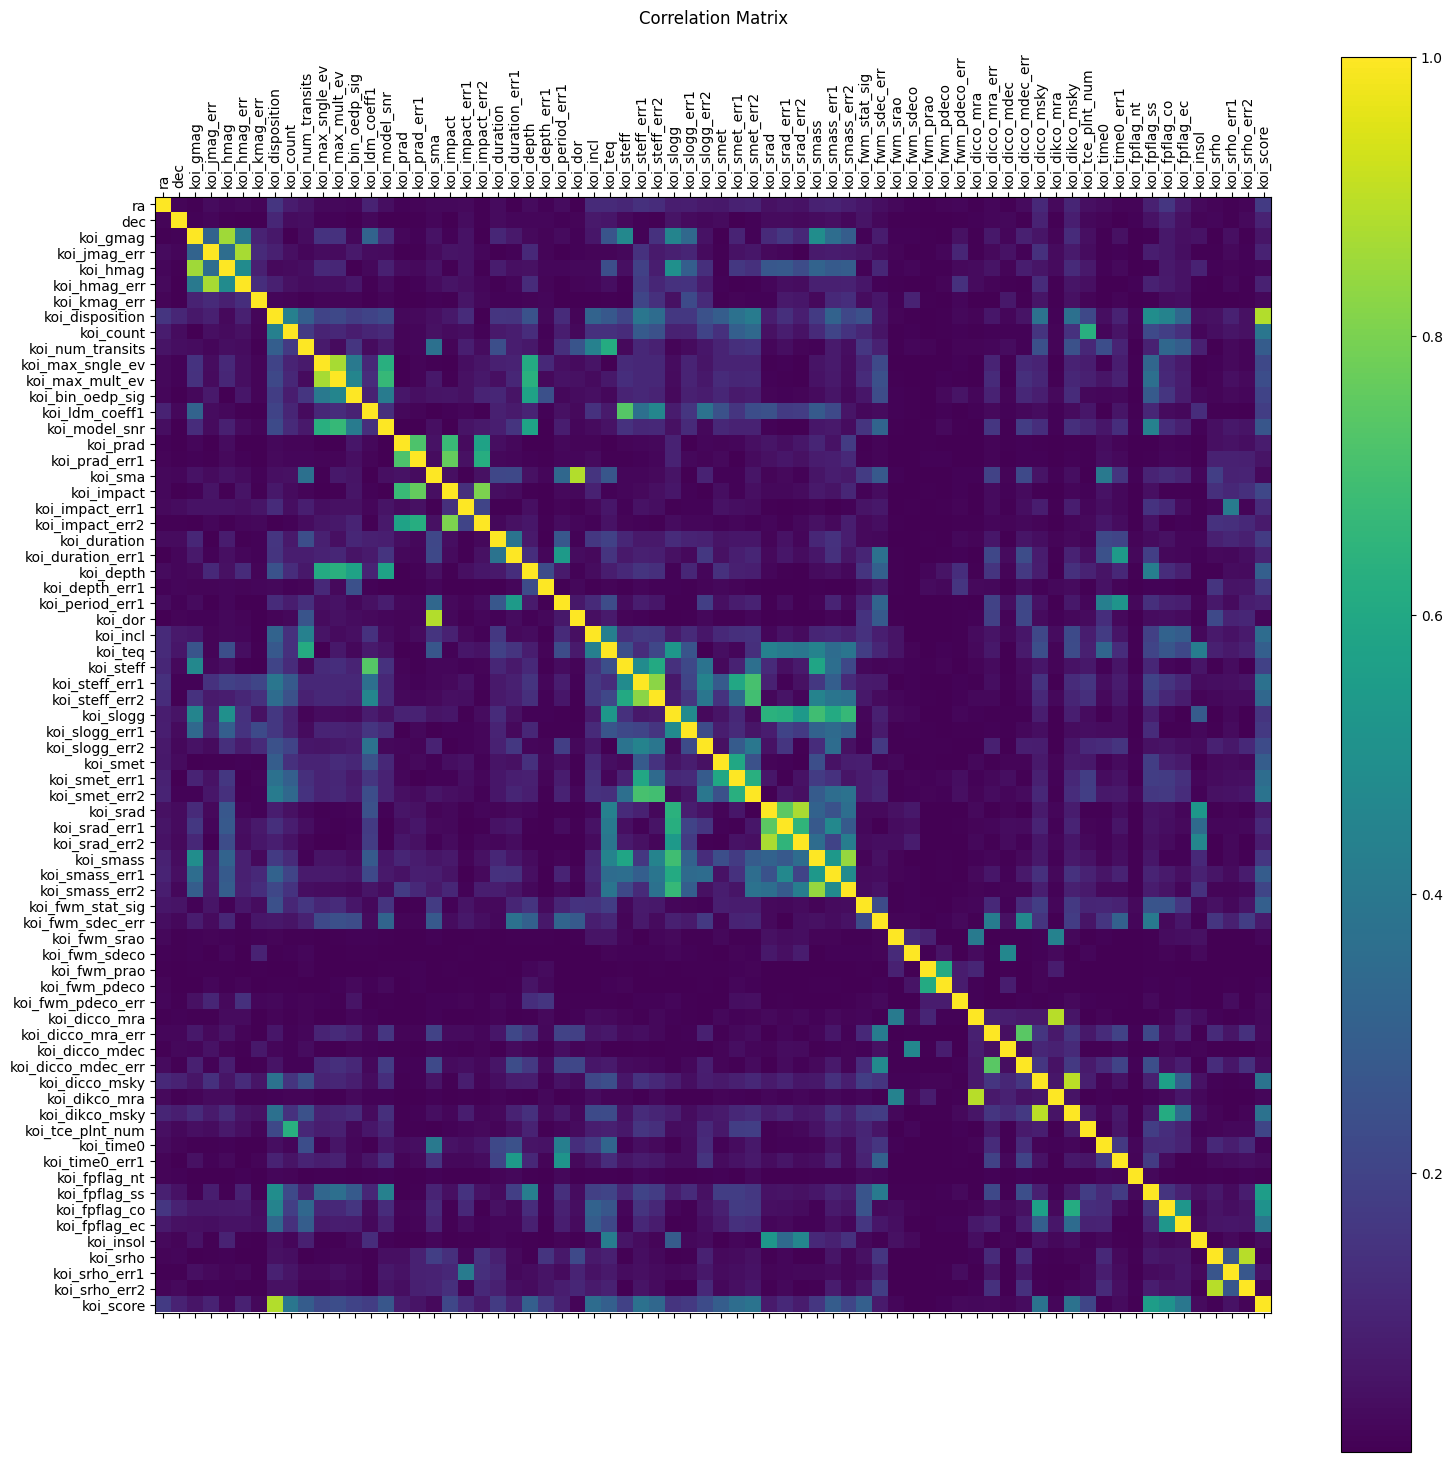

In [64]:
# Make the figure bigger
plt.figure(figsize=(18, 18))

# Plot heatmap
plt.matshow(correlation_table, fignum=1)

# Add colorbar
plt.colorbar()

# Add ticks and labels
plt.xticks(range(len(correlation_table.columns)), correlation_table.columns, rotation=90)
plt.yticks(range(len(correlation_table.columns)), correlation_table.columns)

plt.title("Correlation Matrix", pad=20)
plt.show()


In [ ]:
# List highest off‑diagonal correlations (potential colinearity)

# Build pair list (avoid duplicates by keeping only var1 < var2)
corr_pairs = (
    correlation_table
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'corr'})
)
corr_pairs = corr_pairs[corr_pairs.var1 < corr_pairs.var2]

# Sort descending
corr_pairs_sorted = corr_pairs.sort_values('corr', ascending=False)

# Option 2: show pairs above a high colinearity threshold
THRESHOLD = 0.9
high_colinear = corr_pairs_sorted[corr_pairs_sorted['corr'] >= THRESHOLD]
print(f"\nPairs with corr >= {THRESHOLD}: (count={len(high_colinear)})")
print(high_colinear.to_string(index=False))

Top 30 correlated variable pairs (absolute correlation):
              var1              var2     corr
    koi_dicco_msky    koi_dikco_msky 0.896035
          koi_srho     koi_srho_err2 0.893039
     koi_dicco_mra     koi_dikco_mra 0.893009
           koi_dor           koi_sma 0.886359
   koi_disposition         koi_score 0.886311
          koi_srad     koi_srad_err2 0.873577
   koi_max_mult_ev  koi_max_sngle_ev 0.868505
      koi_hmag_err      koi_jmag_err 0.867975
          koi_gmag          koi_hmag 0.858007
         koi_smass    koi_smass_err2 0.842686
    koi_steff_err1    koi_steff_err2 0.824761
        koi_impact   koi_impact_err2 0.803247
        koi_impact     koi_prad_err1 0.764919
          koi_srad     koi_srad_err1 0.749843
koi_dicco_mdec_err koi_dicco_mra_err 0.742204
    koi_ldm_coeff1         koi_steff 0.737122
          koi_prad     koi_prad_err1 0.722604
     koi_smet_err2    koi_steff_err1 0.710261
     koi_smet_err2    koi_steff_err2 0.695380
         koi_slogg     

In [5]:
result = result.drop('kepler_name', axis=1)
print(result)

         kepid kepoi_name         ra  ra_err        ra_str        dec  \
0     10797460  K00752.01  291.93423     0.0  19h27m44.22s  48.141651   
1     10797460  K00752.02  291.93423     0.0  19h27m44.22s  48.141651   
2     10811496  K00753.01  297.00482     0.0  19h48m01.16s  48.134129   
3     10848459  K00754.01  285.53461     0.0  19h02m08.31s  48.285210   
4     10854555  K00755.01  288.75488     0.0  19h15m01.17s  48.226200   
...        ...        ...        ...     ...           ...        ...   
9559  10090151  K07985.01  297.18875     0.0  19h48m45.30s  47.093819   
9560  10128825  K07986.01  286.50937     0.0  19h06m02.25s  47.163219   
9561  10147276  K07987.01  294.16489     0.0  19h36m39.57s  47.176281   
9562  10155286  K07988.01  296.76288     0.0  19h47m03.09s  47.145142   
9563  10156110  K07989.01  297.00977     0.0  19h48m02.34s  47.121021   

      dec_err       dec_str  koi_gmag  koi_gmag_err  ...  koi_fpflag_co  \
0         0.0  +48d08m29.9s    15.890           